## Prediction using Logistic Regression

In [3]:
## import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

#### Load dataset

In [5]:
url = "Dataset/FINAL Data.csv"
df = pd.read_csv(url)
include = [ 'Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses ' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated', 'Not Suicide(0)/Suicide(1)']  # Except the year, all the features are taken 
df1 = df[include]
print(df1.head(20))
print(df1.describe())

    Age Gender    Religon        Race  \
0    30      F   Buddhist   Sinhalese   
1    91      F      Islam      Muslim   
2    85      M   Buddhist   Sinhalese   
3    87      M   Buddhist  Sinhalese    
4    59      F   Buddhist   Sinhalese   
5    31      M   Buddhist  Sinhalese    
6    75      F  Christian      Burger   
7    47      M   Buddhist   Sinhalese   
8    58      F  Christian      Burger   
9    36      F      Hindu       Tamil   
10   87      M   Buddhist  Sinhalese    
11   73      F  Christian      Burger   
12   44      M   Buddhist  Sinhalese    
13   62      M   Buddhist   Sinhalese   
14   21      F      Hindu       Tamil   
15   70      M   Buddhist  Sinhalese    
16   68      M      Hindu       Tamil   
17   43      F   Buddhist  Sinhalese    
18   16      M      Other      Burger   
19   35      M      Hindu       Tamil   

                                 Nature Of Occupation Civil Status  \
0   Administrative Executive Managerial & related ...    Unmarried  

,Age,Gender,Religon,Race,Nature Of Occupation,Civil Status,Education Level,Reason,Lifetime Psychiatric Hospitalizations,Past Suicide Attempts,...,Self-Injurious Behaviour,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated,Not Suicide(0)/Suicide(1)
0,30,F,Buddhist,Sinhalese,Administrative Executive Managerial & related ...,Unmarried,From Grade 1 to 7,Asthma,0,0,...,0,None,Asthma,None,0,0,0,0,0,0
1,91,F,Islam,Muslim,Sales worker,Married,University Degree or above,Alzheimer's disease,0,0,...,0,None,Other,None,0,1,0,0,0,0
2,85,M,Buddhist,Sinhalese,Security Personnel,Married,University Degree or above,Stroke/Chronic diseases & Physical disabilities,0,0,...,0,None,Diabetes,None,0,1,0,0,0,0
3,87,M,Buddhist,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,0,0,...,0,None,Chronic pain,Frequent,1,1,1,1,1,1
4,59,F,Buddhist,Sinhalese,Pensioners,Unmarried,Other,Alzheimer's disease,0,1,...,0,None,COPD,None,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39,F,Buddhist,Sinhalese,Security Personnel,Divourced,University Degree or above,Natural Death,0,1,...,0,None,Unknown,None,1,0,0,0,0,0
996,34,M,Buddhist,Sinhalese,Security Personnel,Married,Passed G.C.E (O/L),Harrasment by the husband & family disputes,1,0,...,1,BPD,Kidney Disease,Frequent,0,1,1,1,1,1
997,15,M,Buddhist,Sinhalese,Student,Unmarried,Passed Grade 8,Problems caused with the elders,0,0,...,1,Depression,Other,None,0,1,0,1,1,1
998,75,F,Islam,Muslim,Sales worker,Married,University Degree or above,Natural Death,0,0,...,0,None,Diabetes,None,0,0,0,0,0,0


#### Data Preprocessing

In [ ]:
categoricals = []
for col, col_type in df1.dtypes.iteritems():
     if col_type == 'O':
          categoricals.append(col)
     else:
          df1[col].fillna(0, inplace=True)

#### LabelEncoder

In [ ]:
category_col =['Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,
           'Psychiatric Disorders' ,'Past Illnesses ' ,'Alcohol/ drug Consumption'] 
labelEncoder = preprocessing.LabelEncoder()
mapping_dict={}
for col in category_col:
    df1[col] = labelEncoder.fit_transform(df1[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(df1.head(20))



**Analysing Data**


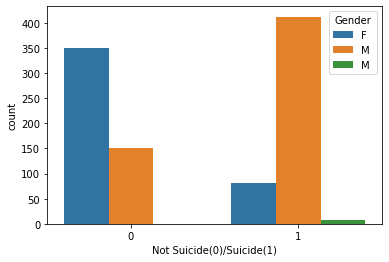

In [6]:
#Comparing Gender
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Gender",data=df1)


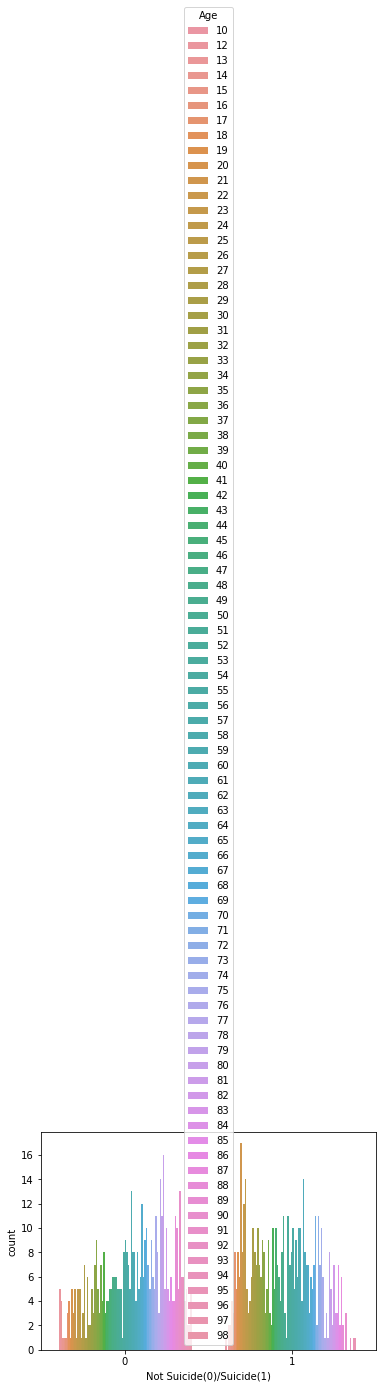

In [7]:
#Comparing Age
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Age",data=df1)



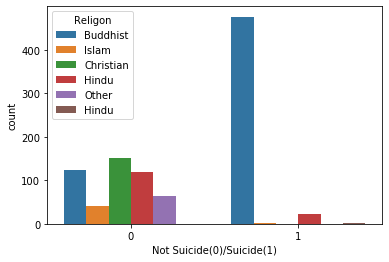

In [8]:
#Comparing Religion
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Religon",data=df1)



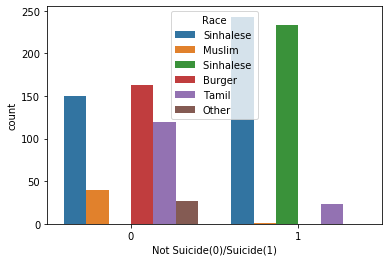

In [10]:
#Comparing Race
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Race",data=df1)



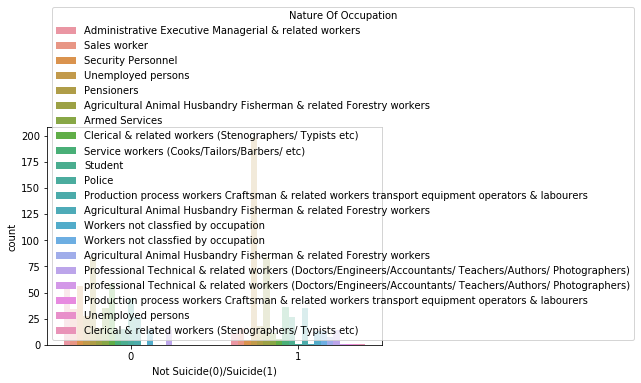

In [11]:
#Comparing Nature Of Occupation
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Nature Of Occupation",data=df1)



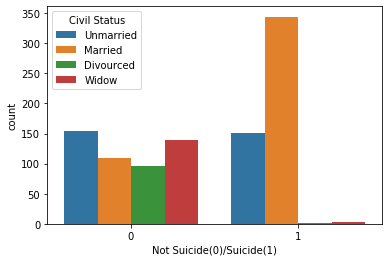

In [13]:
#Comparing Civil Status
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Civil Status",data=df1)



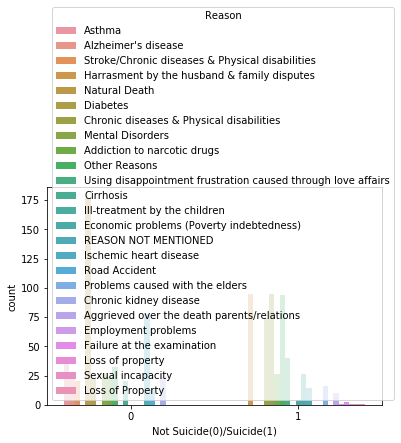

In [15]:
#Comparing Reason
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Reason",data=df1)

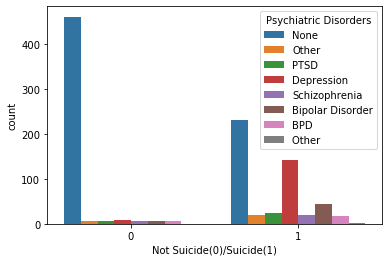

In [16]:
#Comparing Psychiatric Disorders
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Psychiatric Disorders",data=df1)


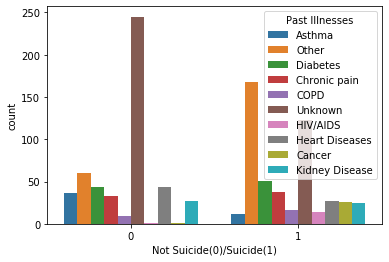

In [18]:
#Comparing Past Illnesses
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Past Illnesses ",data=df1)





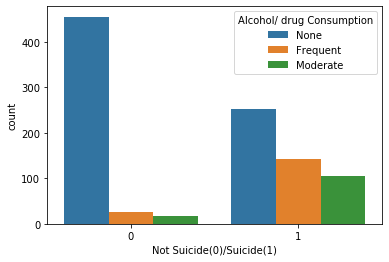

In [21]:
#Comparing Alcohol/ drug Consumption
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Alcohol/ drug Consumption",data=df1)


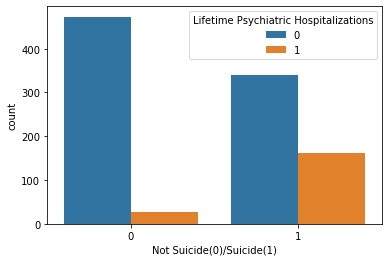

In [22]:
#Comparing Lifetime Psychiatric Hospitalizations
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Lifetime Psychiatric Hospitalizations",data=df1)


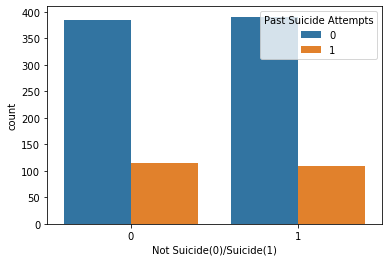

In [23]:
#Comparing Past Suicide Attempts
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Past Suicide Attempts",data=df1)



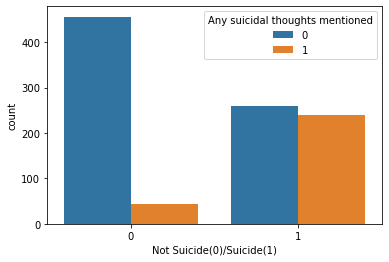

In [24]:
#Comparing Any suicidal thoughts mentioned
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Any suicidal thoughts mentioned",data=df1)



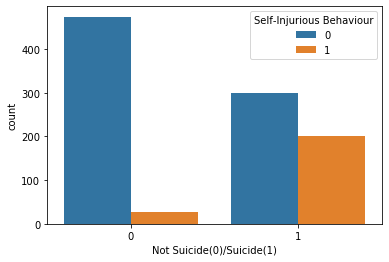

In [25]:
#Comparing Self-Injurious Behaviour
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Self-Injurious Behaviour",data=df1)



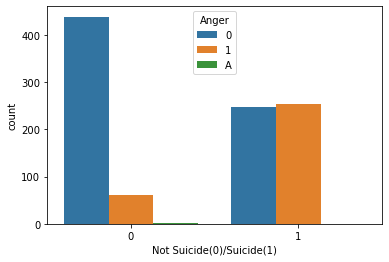

In [26]:
#Comparing Anger
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Anger",data=df1)



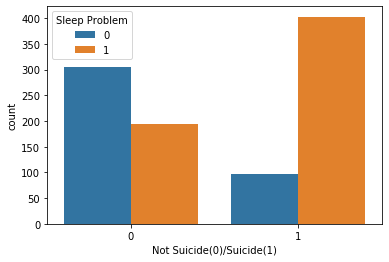

In [27]:
#Comparing Sleep Problem
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Sleep Problem",data=df1)

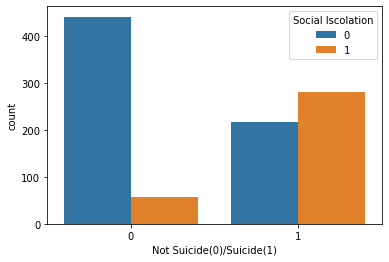

In [28]:
#Comparing Social Iscolation
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Social Iscolation",data=df1)

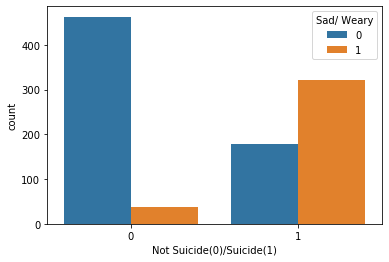

In [29]:
#Comparing Sad/ Weary
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Sad/ Weary",data=df1)



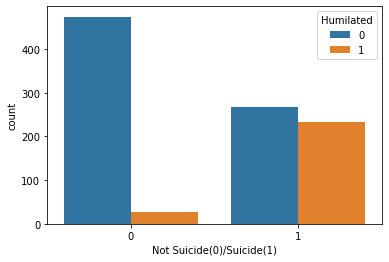

In [30]:

#Comparing Humilated
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Humilated",data=df1)
